In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
def get_new_array(array):

    # Shape: (112, 86400)
    # Every seventh row (0, 7, 14, etc) is empty (between animals)
    # Rows correspond to animals x days
    # Rows contain 0s, nans, and a number from 6 to 1 (depending on the row)
    # The order is inverted (so it goes from P30 to P15, and from pup4 (#6) to adult female (#1))
    # Columns correspond to seconds in 24 hours
    
    # Dropping every 7th row to get rid of empty rows between days
    # New shape: (96, 86400)
    new_array = np.delete(array, np.arange(0, len(array), 7), axis = 0)
    
    # New array with number of seconds that each animal spends in the waterspout region
    final_array = np.zeros((6, 16))
    
    for animal_index in range(6):
        for index in range(animal_index, new_array.shape[0], 6):
            animal_data = new_array[index, :]
            final_array[animal_index, index // 6] = np.where(animal_data == np.unique(animal_data)[1])[0].shape[0]
    
    final_array = np.flip(final_array, axis=0)
    final_array = np.flip(final_array, axis=1)


    return final_array

In [4]:
root_dir = '/home/cat/Downloads/npy_files (1)/npy_files/'

water_c2 = np.load(root_dir+'/cohort2_waterspout.npy')
water_c2_final = get_new_array(water_c2)

water_c3 = np.load(root_dir+'/cohort3_waterspout.npy')
water_c3_final = get_new_array(water_c3)

water_c4 = np.load(root_dir+'/cohort4_waterspout.npy')
water_c4_final = get_new_array(water_c4)

In [ ]:
# One of the arrays had a different shape so I had to fix it

# reshaped_array = np.transpose(water_c3)

# new_data = np.full((112, 86400), np.nan)

# for i in range(96):
#     new_index = i + (i // 6) + 1
#     new_data[new_index] = reshaped_array[i]

# np.save('/Users/lisadiez/Downloads/new_cohort3_waterspout.npy', new_data)

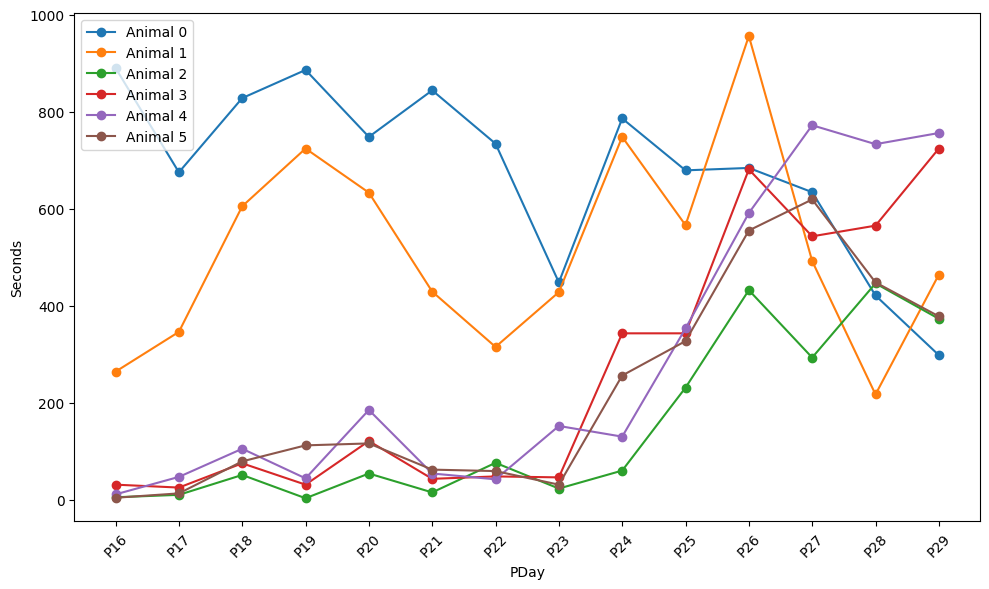

In [5]:
# Plotting to make sure data is ok

data_array = water_c4_final[:, 1:15]

# Number of animals and days
num_animals, num_days = data_array.shape

# Generate the x-axis labels (e.g., P15, P16, ..., P30)
days = [f'P{16 + i}' for i in range(num_days)]

# Plot each animal's data as a separate line
plt.figure(figsize=(10, 6))

for animal in range(num_animals):
    plt.plot(days, data_array[animal, :], marker='o', label=f'Animal {animal}')

# Add labels and title
plt.xlabel('PDay')
plt.ylabel('Seconds')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
def get_relative_arrays(array_c2, array_c3, array_c4):
    
    c2 = array_c2[2:, 1:15] / np.mean(np.mean(array_c2[:2, 1:15], axis = 0))
    c3 = array_c3[2:, 1:15] / np.mean(np.mean(array_c3[:2, 1:15], axis = 0))
    c4 = array_c4[2:, 1:15] / np.mean(np.mean(array_c4[:2, 1:15], axis = 0))
    
    mean = np.mean(np.vstack((c2, c3, c4)), axis = 0)
    std = np.std(np.vstack((c2, c3, c4)), axis = 0)
    sem = stats.sem(np.vstack((c2, c3, c4)), axis = 0)

    return mean, std, sem

In [7]:
mean, std, sem = get_relative_arrays(water_c2_final, water_c3_final, water_c4_final)

In [35]:
shuffled_water_c2 = water_c2_final.copy()
np.random.shuffle(shuffled_water_c2)

shuffled_water_c3 = water_c3_final.copy()
np.random.shuffle(shuffled_water_c3)

shuffled_water_c4 = water_c4_final.copy()
np.random.shuffle(shuffled_water_c4)

#
water_array = np.vstack((water_c2_final[2:, 1:15] / np.mean(np.mean(water_c2_final[:2, 1:15], axis = 0)),
                         water_c3_final[2:, 1:15] / np.mean(np.mean(water_c3_final[:2, 1:15], axis = 0)),
                         water_c4_final[2:, 1:15] / np.mean(np.mean(water_c4_final[:2, 1:15], axis = 0))))

#
print (water_array.shape)

#
print (shuffled_water_c2.shape, shuffled_water_c3.shape, shuffled_water_c4.shape)

# make a vstack of this data
shuffled_water_array = np.vstack((shuffled_water_c2[2:, 1:15] / np.mean(np.mean(shuffled_water_c2[:2, 1:15], axis = 0)),
                                    shuffled_water_c3[2:, 1:15] / np.mean(np.mean(shuffled_water_c3[:2, 1:15], axis = 0)),
                                    shuffled_water_c4[2:, 1:15] / np.mean(np.mean(shuffled_water_c4[:2, 1:15], axis = 0))))
                                  
print (shuffled_water_array.shape)

#
shuffled_mean, shuffled_std, shuffled_sem = get_relative_arrays(shuffled_water_c2, shuffled_water_c3, shuffled_water_c4)

(12, 14)
(6, 16) (6, 16) (6, 16)
(12, 14)


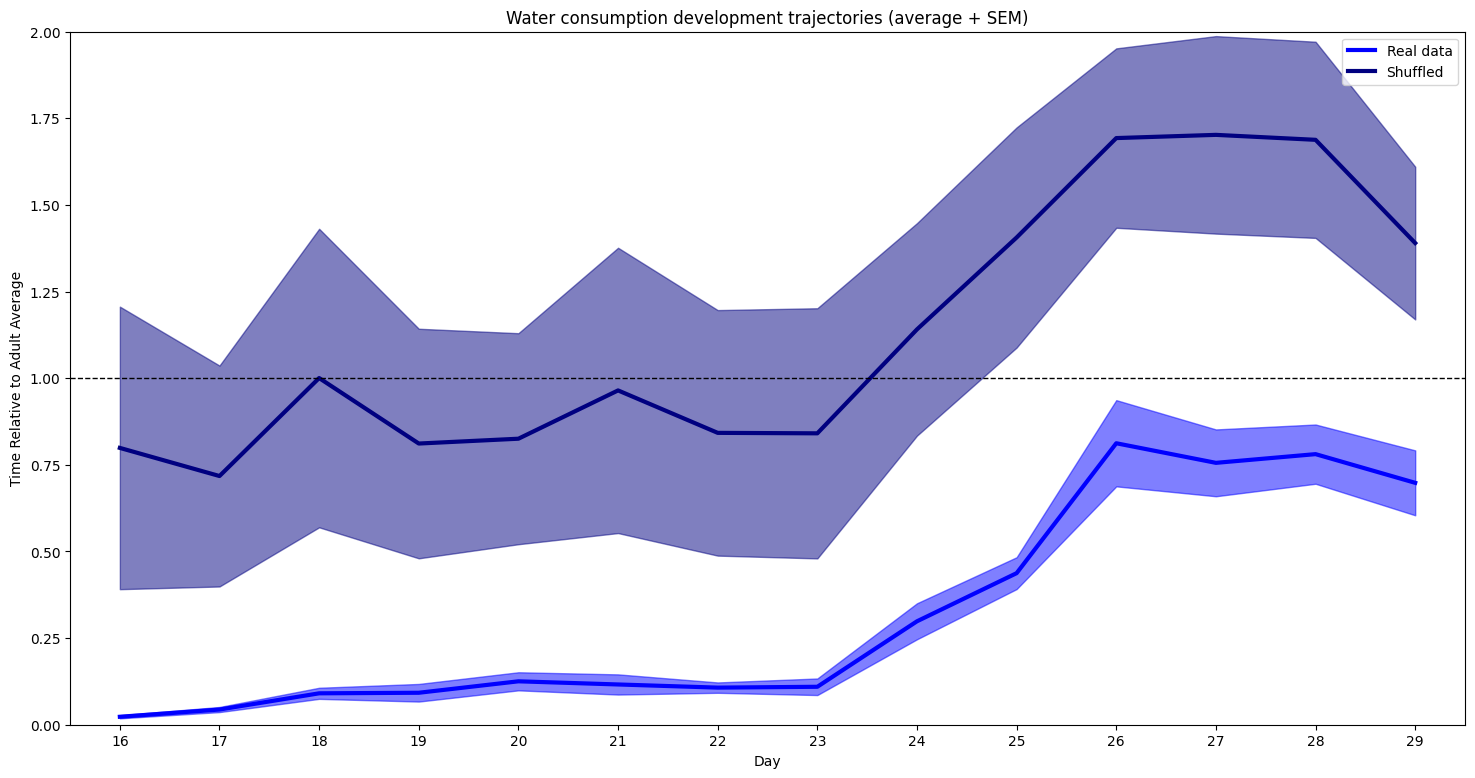

In [54]:
plt.figure(figsize = (18,9))

days = np.arange(16,30)

plt.plot(days, mean, color = 'blue', linewidth = 3, label='water real data')
plt.plot(days, shuffled_mean, color = 'navy', linewidth = 3, label='water shuffled data')
plt.legend()

plt.fill_between(days, mean-sem, mean+sem, color = 'blue', alpha = 0.5)
plt.fill_between(days, shuffled_mean-shuffled_sem, shuffled_mean+shuffled_sem, color = 'navy', alpha = 0.5)

plt.hlines(1, 15.5, 29.5, linestyles = 'dashed', color = 'black', linewidth = 1)

plt.xticks(days)

plt.ylim(0,2)
plt.xlim(15.5,29.5)

plt.ylabel('Time Relative to Adult Average')
plt.xlabel('Day')

plt.title('Water consumption development trajectories (average + SEM)')

plt.legend(('Real data', 'Shuffled'))

#plt.savefig('/Users/lisadiez/Downloads/water_shuffle_test.png')

In [37]:
food_c2 = np.load(root_dir + '/cohort2_foodhopper.npy')
food_c2_final = get_new_array(food_c2)

food_c3 = np.load(root_dir + '/cohort3_foodhopper.npy')
food_c3_final = get_new_array(food_c3)

food_c4 = np.load(root_dir + '/cohort4_foodhopper.npy')
food_c4_final = get_new_array(food_c4)

#
food_array = np.vstack((food_c2_final[2:, 1:15] / np.mean(np.mean(food_c2_final[:2, 1:15], axis = 0)),
                            food_c3_final[2:, 1:15] / np.mean(np.mean(food_c3_final[:2, 1:15], axis = 0)),
                            food_c4_final[2:, 1:15] / np.mean(np.mean(food_c4_final[:2, 1:15], axis = 0))))
print (food_array.shape)
                        



(12, 14)


In [13]:
mean_food, std_food, sem_food = get_relative_arrays(food_c2_final, food_c3_final, food_c4_final)

In [38]:
shuffled_food_c2 = food_c2_final.copy()
np.random.shuffle(shuffled_food_c2)

shuffled_food_c3 = food_c3_final.copy()
np.random.shuffle(shuffled_food_c3)

shuffled_food_c4 = food_c4_final.copy()
np.random.shuffle(shuffled_food_c4)

# make a vstack of this data
shuffled_food_array = np.vstack((shuffled_food_c2[2:, 1:15] / np.mean(np.mean(shuffled_food_c2[:2, 1:15], axis = 0)),
                                    shuffled_food_c3[2:, 1:15] / np.mean(np.mean(shuffled_food_c3[:2, 1:15], axis = 0)),
                                    shuffled_food_c4[2:, 1:15] / np.mean(np.mean(shuffled_food_c4[:2, 1:15], axis = 0))))

print (shuffled_food_array.shape)

shuffled_mean_food, shuffled_std_food, shuffled_sem_food = get_relative_arrays(shuffled_food_c2, shuffled_food_c3, shuffled_food_c4)

(12, 14)


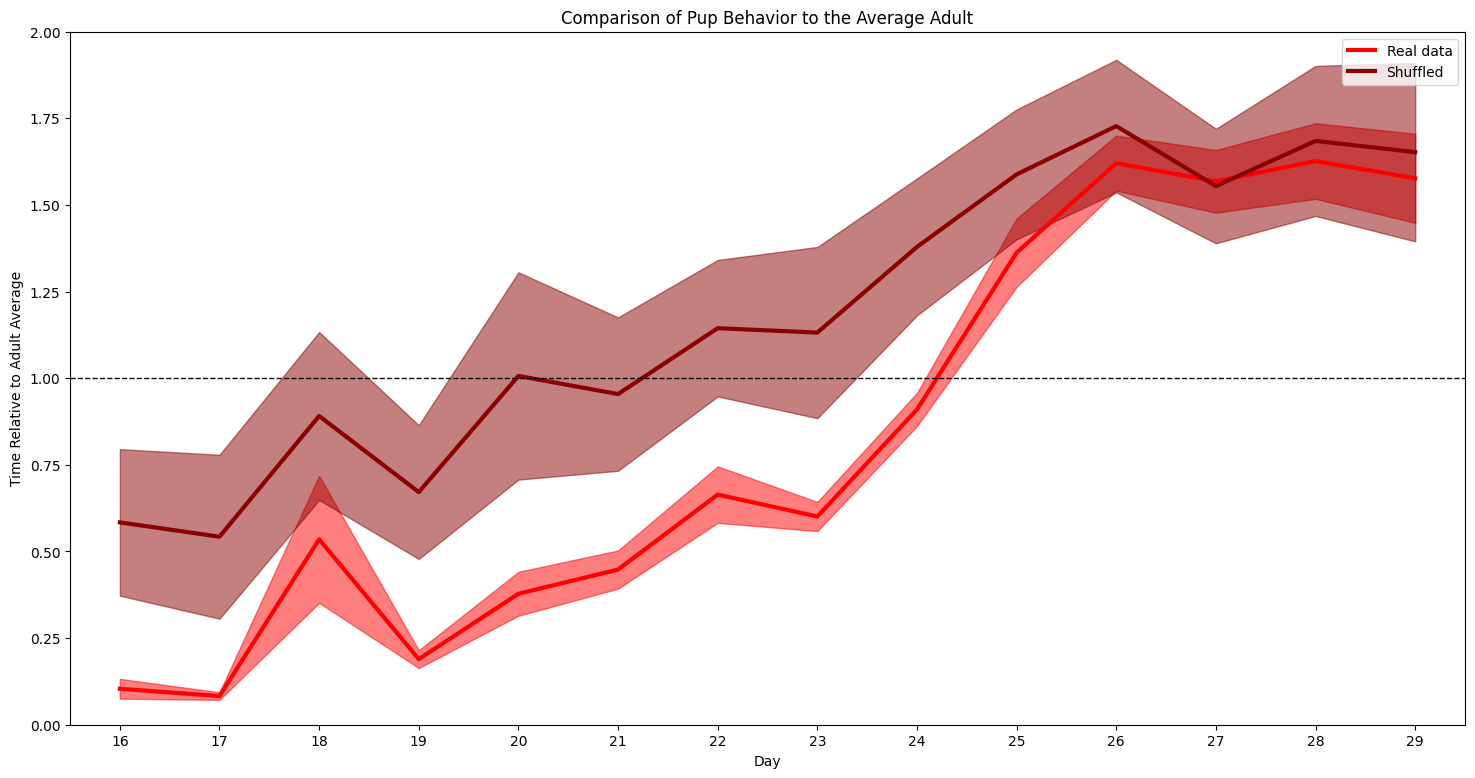

In [56]:
plt.figure(figsize = (18,9))

days = np.arange(16,30)

plt.plot(days, mean_food, color = 'red', linewidth = 3, label = 'food real data')
plt.plot(days, shuffled_mean_food, color = '#8B0000', linewidth = 3, label = 'food shuffled data')

plt.fill_between(days, mean_food-sem_food, mean_food+sem_food, color = 'red', alpha = 0.5)
plt.fill_between(days, shuffled_mean_food-shuffled_sem_food, shuffled_mean_food+shuffled_sem_food, 
                 color = '#8B0000', alpha = 0.5)

plt.hlines(1, 15.5, 29.5, linestyles = 'dashed', color = 'black', linewidth = 1)

plt.xticks(days)

plt.ylim(0,2)
plt.xlim(15.5,29.5)

plt.ylabel('Time Relative to Adult Average')
plt.xlabel('Day')

plt.title('Comparison of Pup Behavior to the Average Adult')

plt.legend(('Real data', 'Shuffled'))

#plt.savefig('/Users/lisadiez/Downloads/food_shuffle_test.png')

(12, 14) (12, 14)
(12, 14) (12, 14)
water array:  [[0.02855827 0.04053432 0.08843851 0.11607554 0.14831875 0.09672962
  0.11607554 0.12068171 0.33717181 0.27729157 0.59603869 0.37309995
  0.69184708 0.40626439]]
shuffled water array:  [[0.0548353  0.11405742 0.17985978 0.14915201 0.22921155 0.38713721
  0.18644001 0.2028906  0.56041675 0.54177275 0.64595981 0.63828287
  0.55712663 0.77866124]]
(24, 14)
[[-1.55091021 -0.01345055]]
(24, 14)
[[-2.41991227 -1.70941806]]


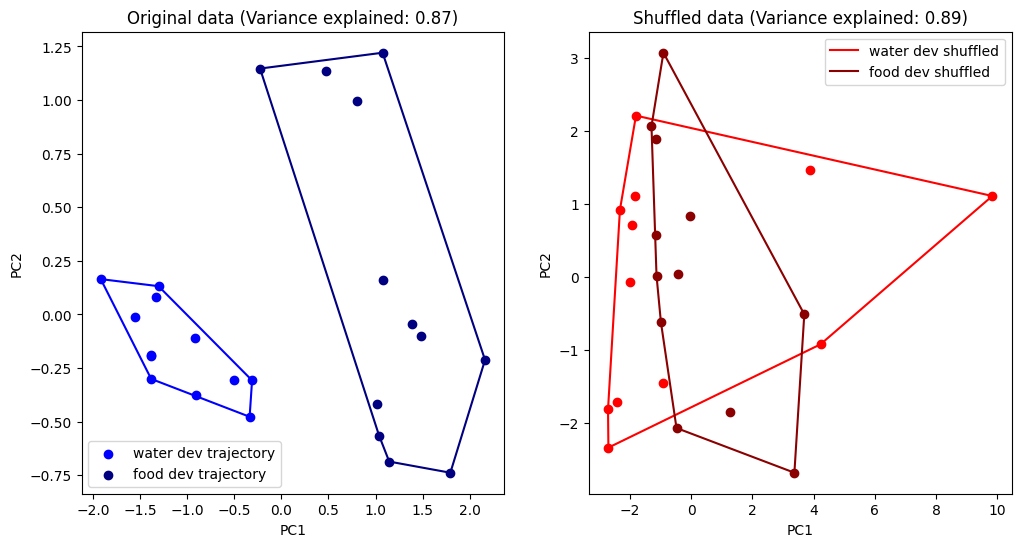

In [118]:
# 
print (water_array.shape, food_array.shape)
print (shuffled_water_array.shape, shuffled_food_array.shape)

print ("water array: ", water_array[:1])
print ("shuffled water array: ", shuffled_water_array[:1])

# run PCA on each of these separately
X_original = np.vstack((water_array.copy(), food_array.copy()))
print (X_original.shape)

###############################################
###############################################
###############################################
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_original)

plt.figure(figsize = (12,6))

ax=plt.subplot(1,2,1)
print (X_pca[:1])

plt.scatter(X_pca[:12,0], X_pca[:12,1], color = 'blue', label='water dev trajectory')
plt.scatter(X_pca[12:,0], X_pca[12:,1], color = 'navy', label='food dev trajectory')
plt.legend()

# plot convex hulls around first 12 and last 12 points
from scipy.spatial import ConvexHull
hull = ConvexHull(X_pca[:12])
for simplex in hull.simplices:
    plt.plot(X_pca[:12, 0][simplex], X_pca[:12, 1][simplex], 'blue')

hull = ConvexHull(X_pca[12:])
for simplex in hull.simplices:
    plt.plot(X_pca[12:, 0][simplex], X_pca[12:, 1][simplex], 'navy')
plt.title("Original data (Variance explained: " + str(np.round(np.sum(pca.explained_variance_ratio_), 2))+ ")")

plt.xlabel("PC1")
plt.ylabel("PC2")

###############################################
###############################################
###############################################
X_shuffled = np.vstack((shuffled_water_array.copy(), shuffled_food_array.copy()))
#X_shuffled = X_original.copy()
print (X_shuffled.shape)

pca = PCA(n_components = 2)

X_pca_shuffled = pca.fit_transform(X_shuffled)
print (X_pca_shuffled[:1])

ax=plt.subplot(1,2,2)
# print title with variance eplxained
plt.title('Variance explained: ' + str(np.round(np.sum(pca.explained_variance_ratio_), 2)))

plt.scatter(X_pca_shuffled[:12,0], X_pca_shuffled[:12,1], color = 'red')
plt.scatter(X_pca_shuffled[12:,0], X_pca_shuffled[12:,1], color = '#8B0000')
plt.title("Shuffled data (Variance explained: " + str(np.round(np.sum(pca.explained_variance_ratio_), 2)) + ")")

#
hull = ConvexHull(X_pca_shuffled[:12])
for ctr,simplex in enumerate(hull.simplices):
    plt.plot(X_pca_shuffled[:12, 0][simplex], X_pca_shuffled[:12, 1][simplex], 'red', 
             label = "water dev shuffled" if ctr==0 else None)

hull = ConvexHull(X_pca_shuffled[12:])
for ctr,simplex in enumerate(hull.simplices):
    plt.plot(X_pca_shuffled[12:, 0][simplex], X_pca_shuffled[12:, 1][simplex], '#8B0000',
             label = "food dev shuffled" if ctr==0 else None)
    
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()



(12, 14)
0.8284635822789984 0.10035577210313215


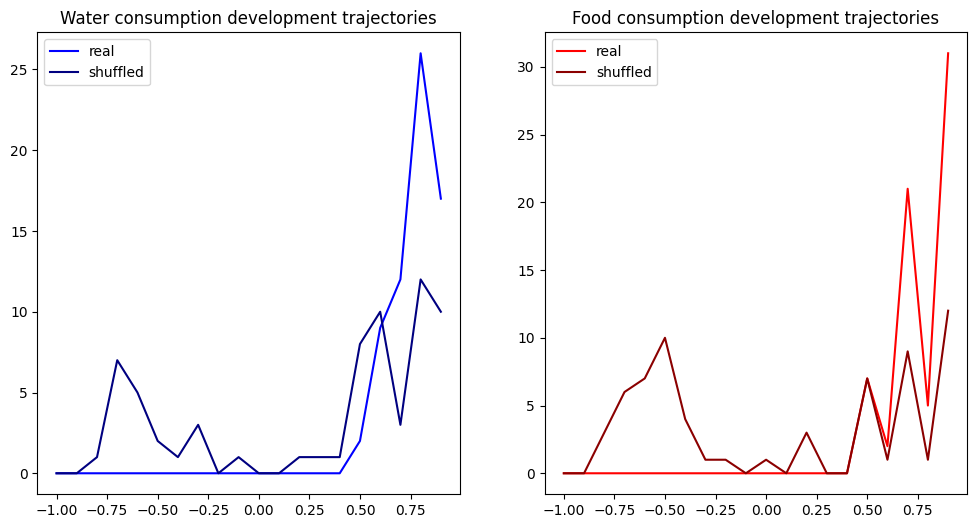

In [97]:
#################
print (water_array.shape)

# compute the pairse pearson correlation between all 12 animals in this array
pcorrs = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs.append(stats.pearsonr(water_array[i], water_array[j])[0])

print (np.mean(pcorrs), np.std(pcorrs))
plt.figure(figsize=(12,6))

# ################
ax=plt.subplot(1,2,1)
# compute histogram 
y = np.histogram(pcorrs, bins = np.arange(-1, 1.1, 0.1))  
plt.plot(y[1][:-1], y[0], label = 'real',
         color='blue')


# same but for shuffled data
pcorrs_shuffled_water= []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_shuffled_water.append(stats.pearsonr(shuffled_water_array[i], shuffled_water_array[j])[0])


y = np.histogram(pcorrs_shuffled_water, bins = np.arange(-1, 1.1, 0.1))

plt.plot(y[1][:-1], y[0], label = 'shuffled',
            color='navy')

plt.legend()
plt.title('Water consumption development trajectories')

########################################
# same for food
pcorrs_food_food = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_food_food.append(stats.pearsonr(food_array[i], food_array[j])[0])

#
ax=plt.subplot(1,2,2)
y = np.histogram(pcorrs_food_food, bins = np.arange(-1, 1.1, 0.1))
plt.plot(y[1][:-1], y[0], label = 'real',
            color='red')

# same but for shuffled data
pcorrs_shuffled_food = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_shuffled_food.append(stats.pearsonr(shuffled_food_array[i], shuffled_food_array[j])[0])

#
y = np.histogram(pcorrs_shuffled_food, bins = np.arange(-1, 1.1, 0.1))
plt.plot(y[1][:-1], y[0], label = 'shuffled',
            color='#8B0000')
plt.legend()

plt.title('Food consumption development trajectories')

plt.show()


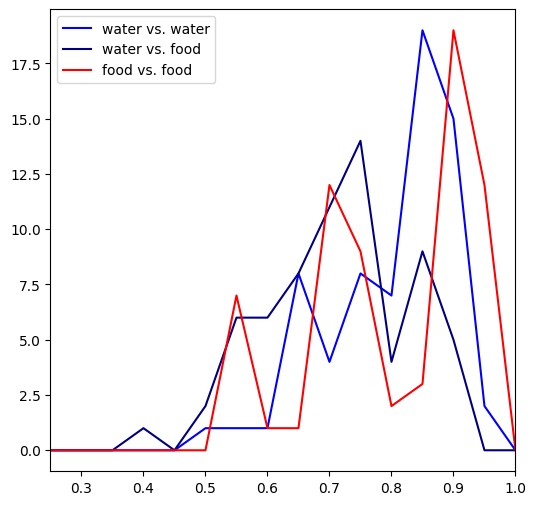

In [101]:
# same but now we will compare between water and food;
# so water vs. water; water vs. food; food vs. food 


bin_width = .05
# compute the pairse pearson correlation between all 12 animals in this array
pcorrs_water_water = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_water_water.append(stats.pearsonr(water_array[i], water_array[j])[0])


#
plt.figure(figsize=(6,6))

# ################
ax=plt.subplot(1,1,1)
# compute histogram
y = np.histogram(pcorrs_water_water, bins = np.arange(-1, 1.1, bin_width))
plt.plot(y[1][:-1], y[0], label = 'water vs. water',
         color='blue')


# same but for water vs. food
pcorrs_water_food = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_water_food.append(stats.pearsonr(water_array[i], food_array[j])[0])

#
y = np.histogram(pcorrs_water_food, bins = np.arange(-1, 1.1, bin_width))
plt.plot(y[1][:-1], y[0], label = 'water vs. food',
            color='navy')

plt.legend()

########################################
# same for food vs. food
pcorrs_food_food = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_food_food.append(stats.pearsonr(food_array[i], food_array[j])[0])

#
ax=plt.subplot(111)
y = np.histogram(pcorrs_food_food, bins = np.arange(-1, 1.1, bin_width))
plt.plot(y[1][:-1], y[0], label = 'food vs. food',
            color='red')

plt.legend()

plt.xlim(0.25,1)

plt.show()




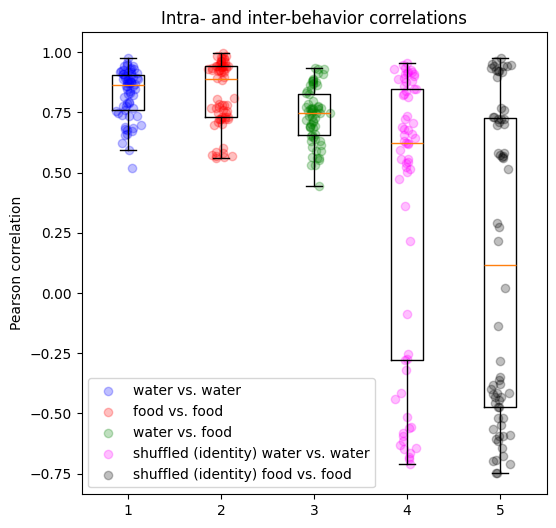

In [112]:
# show same plots but instead of histograms, show the actual data points
plt.figure(figsize=(6,6))

# water water
plt.scatter(np.random.normal(1, 0.05, len(pcorrs_water_water)), pcorrs_water_water, color = 'blue', label = 'water vs. water', 
            alpha=0.25)
plt.boxplot(pcorrs_water_water, positions = [1], showfliers=False, widths = 0.35)

# food food
plt.scatter(np.random.normal(2, 0.05, len(pcorrs_food_food)), pcorrs_food_food, color = 'red', label = 'food vs. food',
            alpha=0.25)
plt.boxplot(pcorrs_food_food, positions = [2], showfliers=False, widths = 0.35)

# water vs food
plt.scatter(np.random.normal(3, 0.05, len(pcorrs_water_food)), pcorrs_water_food, color = 'green', label = 'water vs. food',
            alpha=0.25)
plt.boxplot(pcorrs_water_food, positions = [3], showfliers=False, widths = 0.35)

# shuffled water
plt.scatter(np.random.normal(4, 0.05, len(pcorrs_shuffled_water)), pcorrs_shuffled_water, color = 'magenta', 
            label = 'shuffled (identity) water vs. water',
            alpha=0.25)
plt.boxplot(pcorrs_shuffled_water, positions = [4], showfliers=False, widths = 0.35)

# shuffled food
plt.scatter(np.random.normal(5, 0.05, len(pcorrs_shuffled_food)), pcorrs_shuffled_food, color = 'black', label = 'shuffled (identity) food vs. food',
            alpha=0.25)
plt.boxplot(pcorrs_shuffled_food, positions = [5], showfliers=False, widths = 0.35)

# shuffled food vs. shuffled water



#    
plt.ylabel("Pearson correlation")
plt.title("Intra- and inter-behavior correlations")
plt.legend()
plt.show()


In [123]:
fname = '/home/cat/Downloads/npy_files/pca-umap/huddling.npy'

huddling = np.load(fname)
print (huddling.shape)

#
fname = '/home/cat/Downloads/npy_files/pca-umap/nest_exits.npy'
nest_exits = np.load(fname)
print (nest_exits.shape)

#
fname = '/home/cat/Downloads/npy_files/pca-umap/pup_adult_approaches.npy'
pup_adult_approaches = np.load(fname)

#
fname = '/home/cat/Downloads/npy_files/pca-umap/pup_pup_approaches.npy'
pup_pup_approaches = np.load(fname)




(12, 14)
(12, 14)


-0.819362325494004 0.12390621445166076
-0.7098867141016001 0.15026329855776244
0.7444775489801845 0.12016192422192863
0.7837679089040671 0.12149880480117455


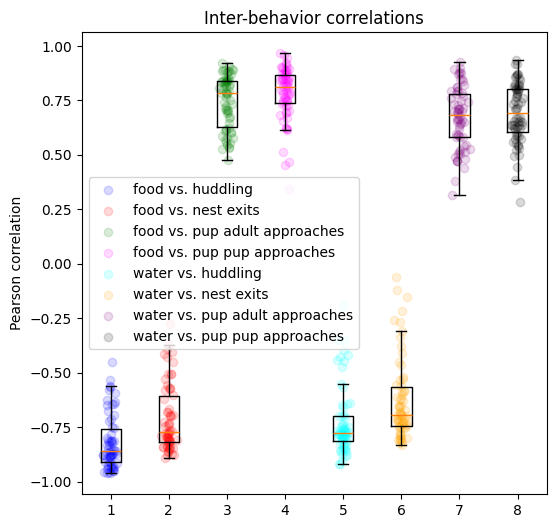

In [127]:
# ok so now compute all pairwise correlations between food seeking and these new behaviors

# compute the pairse pearson correlation between all 12 animals and food
pcorrs_huddling = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_huddling.append(stats.pearsonr(food_array[i], huddling[j])[0])

print (np.mean(pcorrs_huddling), np.std(pcorrs_huddling))

# compute the pairse pearson correlation between all 12 animals and food
pcorrs_nest_exits = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_nest_exits.append(stats.pearsonr(food_array[i], nest_exits[j])[0])

print (np.mean(pcorrs_nest_exits), np.std(pcorrs_nest_exits))

# compute the pairse pearson correlation between all 12 animals and food
pcorrs_pup_adult_approaches = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_pup_adult_approaches.append(stats.pearsonr(food_array[i], pup_adult_approaches[j])[0])

print (np.mean(pcorrs_pup_adult_approaches), np.std(pcorrs_pup_adult_approaches))



# compute the pairse pearson correlation between all 12 animals and food
pcorrs_pup_pup_approaches = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_pup_pup_approaches.append(stats.pearsonr(food_array[i], pup_pup_approaches[j])[0])

print (np.mean(pcorrs_pup_pup_approaches), np.std(pcorrs_pup_pup_approaches))

# ok do the same but for water
# compute the pairse pearson correlation between all 12 animals and food
pcorrs_huddling_water = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_huddling_water.append(stats.pearsonr(water_array[i], huddling[j])[0])

# compute the pairse pearson correlation between all 12 animals and food
pcorrs_nest_exits_water = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_nest_exits_water.append(stats.pearsonr(water_array[i], nest_exits[j])[0])

# compute the pairse pearson correlation between all 12 animals and food
pcorrs_pup_adult_approaches_water = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_pup_adult_approaches_water.append(stats.pearsonr(water_array[i], pup_adult_approaches[j])[0])

# compute the pairse pearson correlation between all 12 animals and food
pcorrs_pup_pup_approaches_water = []
for i in range(12):
    for j in range(i+1, 12):
        pcorrs_pup_pup_approaches_water.append(stats.pearsonr(water_array[i], pup_pup_approaches[j])[0])




# plot now as scatter same as previous cell
plt.figure(figsize=(6,6))

# huddling
plt.scatter(np.random.normal(1, 0.05, len(pcorrs_huddling)), pcorrs_huddling, color = 'blue', label = 'food vs. huddling', 
            alpha=0.15)
plt.boxplot(pcorrs_huddling, positions = [1], showfliers=False, widths = 0.35)

# nest exits
plt.scatter(np.random.normal(2, 0.05, len(pcorrs_nest_exits)), pcorrs_nest_exits, color = 'red', label = 'food vs. nest exits',
            alpha=0.15)
plt.boxplot(pcorrs_nest_exits, positions = [2], showfliers=False, widths = 0.35)

# pup adult approaches
plt.scatter(np.random.normal(3, 0.05, len(pcorrs_pup_adult_approaches)), pcorrs_pup_adult_approaches, color = 'green', label = 'food vs. pup adult approaches',
            alpha=0.15)
plt.boxplot(pcorrs_pup_adult_approaches, positions = [3], showfliers=False, widths = 0.35)

# pup pup approaches
plt.scatter(np.random.normal(4, 0.05, len(pcorrs_pup_pup_approaches)), pcorrs_pup_pup_approaches, color = 'magenta', label = 'food vs. pup pup approaches',
            alpha=0.15)
plt.boxplot(pcorrs_pup_pup_approaches, positions = [4], showfliers=False, widths = 0.35)

# water huddling
plt.scatter(np.random.normal(5, 0.05, len(pcorrs_huddling_water)), pcorrs_huddling_water, color = 'cyan', label = 'water vs. huddling', 
            alpha=0.15)
plt.boxplot(pcorrs_huddling_water, positions = [5], showfliers=False, widths = 0.35)

# water nest exits
plt.scatter(np.random.normal(6, 0.05, len(pcorrs_nest_exits_water)), pcorrs_nest_exits_water, color = 'orange', label = 'water vs. nest exits',
            alpha=0.15)
plt.boxplot(pcorrs_nest_exits_water, positions = [6], showfliers=False, widths = 0.35)

# water pup adult approaches
plt.scatter(np.random.normal(7, 0.05, len(pcorrs_pup_adult_approaches_water)), pcorrs_pup_adult_approaches_water, color = 'purple', label = 'water vs. pup adult approaches',
            alpha=0.15)
plt.boxplot(pcorrs_pup_adult_approaches_water, positions = [7], showfliers=False, widths = 0.35)

# water pup pup approaches
plt.scatter(np.random.normal(8, 0.05, len(pcorrs_pup_pup_approaches_water)), pcorrs_pup_pup_approaches_water, color = 'black', label = 'water vs. pup pup approaches',
            alpha=0.15)
plt.boxplot(pcorrs_pup_pup_approaches_water, positions = [8], showfliers=False, widths = 0.35)




plt.ylabel("Pearson correlation")
plt.title("Inter-behavior correlations")
plt.legend()
plt.show()

In [77]:
# ok so now we try to load all the npy files at this location
import os
fname_dir = '/home/cat/code/gerbil/meta_data/fig2'

fnames = os.listdir(fname_dir)
print (fnames)

# load all the npy files
data = []
for fname in fnames:
    temp = np.load(fname_dir + '/' + fname)
    print (fname, temp.shape)



['pup_pup_approaches.npy', 'exploration.npy', 'huddling.npy', 'exits.npy', 'pairwise_pup_pup.npy', 'pup_adult_approaches.npy', 'distance.npy', 'pairwise_adult_pup.npy', 'food.npy', 'water.npy']
pup_pup_approaches.npy (36, 14)
exploration.npy (12, 14)
huddling.npy (12, 14)
exits.npy (12, 14)
pairwise_pup_pup.npy (18, 14)
pup_adult_approaches.npy (24, 14)
distance.npy (12, 14)
pairwise_adult_pup.npy (24, 14)
food.npy (12, 14)
water.npy (12, 14)
